In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from math import sqrt
import pandas as pd

In [ ]:
T = 6
a = 0.04
b = [0.15,0.15*3]
h = [0.5,0.25,0.1,0.05,0.025,0.01]
xi_0 = 1000
N = int(T/h[0])+1
n = 20

In [ ]:
def W(T, h, n):
  l = int(T/h)+1
  w = np.zeros((n,l))
  for i in range (0,n):
    for j in range(1,l):
      w[i][j]=w[i][j-1] + np.random.normal(0, np.sqrt(h))
  return w

In [ ]:
w = W(T, h[0], n)
df = pd.DataFrame(w)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.393368,1.069779,0.580305,0.331748,1.700259,1.649660,3.687829,4.202618,3.830920,4.153698,3.264376,2.287711
1,0.0,-0.500461,-1.223591,-1.098160,-1.547169,-1.060200,-0.751145,-0.571760,-1.150819,-1.082024,-1.657151,-1.194849,-1.626986
2,0.0,0.640681,0.181872,0.506209,0.248246,0.615035,-0.330026,-0.810677,-0.891233,0.424474,0.014862,-1.630928,-1.405764
3,0.0,0.369317,0.857069,0.806597,1.391001,0.726984,1.128571,0.537353,0.338928,1.334240,1.615628,2.463019,2.229536
4,0.0,-0.835268,-2.268021,-2.229337,-3.072737,-2.617950,-1.986183,-2.197107,-1.025807,-1.660331,-1.541994,-0.482767,-1.054524
5,0.0,-0.419295,-0.851250,1.248126,1.666605,1.406722,0.326703,-0.456597,0.165095,-0.001054,1.107081,1.433246,-0.006637
6,0.0,0.985939,1.230394,2.285683,1.860861,2.128314,2.530942,2.826344,3.330628,3.872367,4.126007,5.160256,4.639723
7,0.0,-0.303560,0.465946,0.447100,0.256388,0.427081,-0.652139,-1.899676,-1.263615,-0.489065,0.824712,0.371514,0.103347
8,0.0,-1.290753,-2.446861,-2.740844,-3.656706,-4.766538,-4.550233,-4.028393,-3.162512,-3.264065,-2.793250,-1.848225,-2.299426
9,0.0,0.447568,0.576163,1.751265,1.828025,1.720418,1.872644,1.123840,1.166765,2.985785,1.274495,2.244486,1.899746


In [ ]:
def Xi(T, h, xi_0, a, b, w, n):
  l = int(T/h)+1
  xi = np.zeros((n,l))
  for i in range (0,n):
    xi[i] = np.array([xi_0*np.exp((a-(b**2)/2)*j*h + b*w[i][j]) for j in range(l)])
  return xi

In [ ]:
xi = Xi(T, h[0], xi_0, a, b[0], w, n)
df = pd.DataFrame(xi)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1000.0,1076.139681,1208.302883,1139.022910,1113.226100,1386.682093,1396.122930,1922.832503,2107.268775,2021.850071,2152.876288,1911.295692,1674.737861
1,1000.0,941.111011,856.596205,885.503410,839.813523,916.534956,973.924249,1014.971900,944.005947,967.607617,900.484259,979.118730,930.951743
2,1000.0,1116.810826,1057.630240,1126.433364,1099.369514,1178.367743,1037.429513,979.241866,981.488563,1212.938733,1157.172173,917.122463,962.362015
3,1000.0,1072.264207,1170.358694,1178.349371,1304.930960,1198.322427,1291.153073,1198.688421,1180.383357,1390.288076,1471.223321,1694.822160,1660.187184
4,1000.0,895.014623,732.381968,747.309770,668.037743,725.555684,809.225726,795.375386,961.874668,887.209037,916.173882,1089.490201,1014.424416
5,1000.0,952.639057,905.799355,1259.032915,1360.008201,1326.950363,1144.829147,1032.657354,1150.002582,1137.936969,1363.168980,1452.246842,1187.089508
6,1000.0,1176.172869,1237.767181,1471.051399,1400.219597,1478.639085,1593.433722,1689.743301,1848.906156,2034.459148,2143.952474,2539.998293,2383.234082
7,1000.0,969.321435,1103.670991,1116.490263,1100.713106,1145.609908,988.495862,831.664293,928.168320,1057.613794,1306.637142,1238.439519,1206.836035
8,1000.0,835.906923,712.996179,692.116116,612.010474,525.657342,550.854267,604.330531,698.111225,697.512558,759.391754,887.711226,841.630770
9,1000.0,1084.924341,1122.069093,1357.730755,1393.339958,1390.881526,1443.609506,1308.918262,1336.447185,1781.120639,1397.834542,1640.166792,1580.058451


In [ ]:
def X(T, h, xi_0, a, b, w, n):
  l = int(T/h)+1
  x = np.zeros((n,l))
  for i in range (0,n):
    x[i][0] = xi_0
    for j in range(1, l):
      x[i][j] = x[i][j-1] + a*x[i][j-1]*h + b*x[i][j-1]*(w[i][j]-w[i][j-1])
  return x

In [ ]:
x = X(T, h[0], xi_0, a, b[0], w, n)
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1000.0,1079.005268,1210.062900,1145.420129,1125.623143,1379.199826,1396.315901,1851.131319,2031.095212,1958.473970,2092.466468,1855.184178,1620.503875
1,1000.0,944.930825,861.333296,894.765667,852.397226,931.708814,993.535445,1040.139887,970.597444,1000.025168,933.754533,1017.181045,971.590512
2,1000.0,1116.102147,1061.612518,1134.492793,1113.284041,1196.800791,1051.079307,996.320551,1004.208117,1222.478815,1171.817002,905.968619,954.686795
3,1000.0,1075.397494,1175.584518,1190.196262,1318.333403,1213.390724,1310.750857,1220.724952,1208.806146,1413.453049,1501.381520,1722.247606,1696.375216
4,1000.0,894.709777,720.319332,738.905438,660.204537,718.446559,800.899133,791.577700,946.485476,875.330083,908.374277,1070.867888,1000.443860
5,1000.0,957.105809,914.233911,1220.416661,1321.432783,1296.348843,1112.263496,1003.823395,1117.510161,1112.009507,1319.088112,1410.005973,1133.669641
6,1000.0,1167.890837,1234.073178,1454.100140,1390.522079,1474.117552,1592.627956,1695.050439,1857.169423,2045.227905,2163.945342,2542.932958,2395.239449
7,1000.0,974.465996,1106.433923,1125.434915,1115.748496,1166.630998,1001.105907,833.790485,930.017602,1056.669646,1286.037268,1224.333669,1199.571463
8,1000.0,826.386992,699.605832,682.747205,602.606787,514.340056,541.314994,594.513266,683.620194,686.879066,749.125607,870.299450,828.803492
9,1000.0,1087.135253,1129.847854,1351.597848,1394.192060,1399.572282,1459.521339,1324.777546,1359.802937,1758.025307,1341.912223,1563.996892,1514.400832


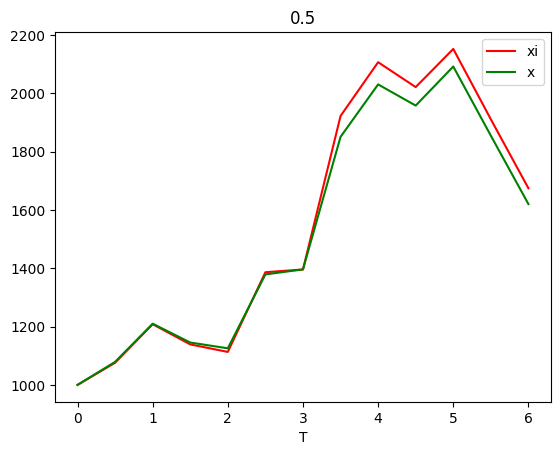

In [ ]:
i=0
N=int(T/h[i])+1
s=np.linspace(0,T,N)
plt.plot(s, xi[i], color='red',label='xi')
plt.plot(s, x[i], color='green',label='x')
plt.title(h[i])
plt.xlabel("T")
plt.legend()
plt.show()

In [ ]:
def eps_val (x,xi,n,T,h):
  delta = np.empty(n)
  for j in range(n):
    delta[j] = np.abs(xi[j][-1]-x[j][-1])
  return delta.mean()


In [ ]:
eps_b = eps_val (x,xi,n,T,h[0])
print ('eps(h=0.5) =',eps_b)

eps(h=0.5) = 38.76699666408791


In [ ]:
xi_3b = Xi(T, h[0], xi_0, a, b[1], w, n)
x_3b = X(T, h[0], xi_0, a, b[1], w, n)
eps_3b = eps_val (x_3b,xi_3b,n,T,h[0])
print ('eps(h=0.5) =',eps_3b)

eps(h=0.5) = 488.15093604057756


In [ ]:
df = pd.DataFrame(xi_3b)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1000.0,1157.648514,1522.190472,1184.430887,1027.148575,1844.100695,1748.218338,4242.480334,5187.117089,4255.826164,4772.709961,3102.146077,1938.607547
1,1000.0,774.271629,542.337958,556.522926,440.993023,532.477192,593.471994,623.961121,466.326876,466.481982,349.249824,417.046689,332.989770
2,1000.0,1293.926560,1020.805835,1145.589070,989.268535,1131.609140,717.299434,560.357761,524.109444,918.869068,741.142578,342.736686,367.844953
3,1000.0,1145.186474,1383.243125,1311.398156,1654.419854,1190.076754,1382.795288,1027.813705,911.665434,1383.730238,1523.153318,2162.972524,1888.515505
4,1000.0,665.979981,338.964716,334.514022,221.965832,264.159452,340.434632,300.269980,493.312042,359.596047,367.825251,574.577462,430.832507
5,1000.0,803.074676,641.265070,1599.644946,1872.870328,1615.912882,963.932726,657.149528,843.068187,758.737691,1211.593415,1360.817621,690.398412
6,1000.0,1511.416831,1636.283136,2551.501851,2043.956188,2235.838629,2599.122230,2879.106129,3503.570500,4335.946933,4713.606033,7280.796218,5586.624564
7,1000.0,846.007537,1160.006563,1115.519496,992.900069,1039.834428,620.510677,343.272997,443.247687,609.141736,1067.020632,843.923359,725.427794
8,1000.0,542.555973,312.754215,265.735289,170.670984,100.452816,107.382830,131.710100,188.599318,174.740322,209.462099,310.809109,246.044804
9,1000.0,1186.230649,1218.990620,2006.103397,2013.976521,1860.905527,1932.742030,1338.237067,1323.188317,2909.491185,1306.396849,1960.390755,1628.054138


In [ ]:
df = pd.DataFrame(x_3b)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1000.0,1197.015805,1585.309289,1267.830492,1151.379239,1883.460863,1878.244517,3638.490023,4554.134180,3883.473424,4525.218818,2804.752730,1628.161208
1,1000.0,794.792475,552.056170,594.257563,486.070411,602.307351,698.119368,768.436070,583.568624,613.305855,466.844185,573.301318,473.282361
2,1000.0,1308.306441,1064.354269,1240.985592,1121.747429,1329.332512,790.583898,635.397864,625.072703,1007.659775,842.075457,235.271213,263.815269
3,1000.0,1186.192483,1470.271763,1466.284431,1881.215861,1356.718578,1629.031287,1228.211246,1143.107095,1677.955621,1923.985552,2696.130413,2466.777687
4,1000.0,644.129332,241.716880,250.758971,160.603514,196.683808,256.533751,237.315235,367.146821,269.656266,289.409034,433.144597,330.363490
5,1000.0,831.317426,686.352454,1348.489759,1629.401068,1471.435294,785.733467,524.488936,681.710399,644.375356,978.587416,1141.790692,424.806480
6,1000.0,1463.672510,1653.956931,2472.466903,2049.254967,2336.876397,2807.014802,3236.294634,4035.425481,5099.899837,5783.991230,8591.609979,6750.943828
7,1000.0,883.397989,1206.966950,1220.870665,1140.512387,1250.927389,668.434347,306.549491,400.423433,547.998387,882.934789,720.528731,647.989399
8,1000.0,439.160977,219.471300,194.826436,118.427582,61.650496,68.884392,86.438063,121.847110,118.715790,146.242042,211.357937,172.670922
9,1000.0,1221.405758,1316.513446,2039.010859,2150.222395,2089.106786,2273.995920,1553.226513,1614.293306,2967.973486,741.754851,1080.362949,934.369942


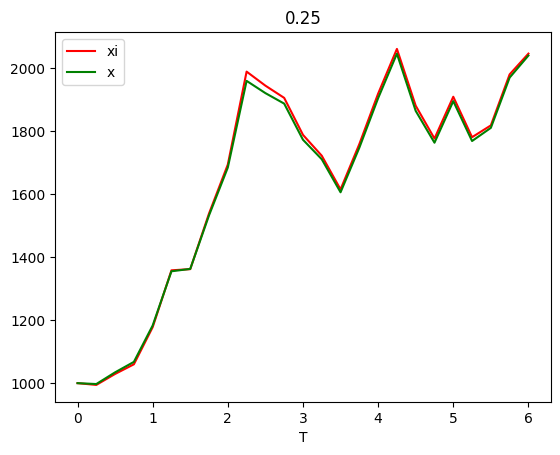

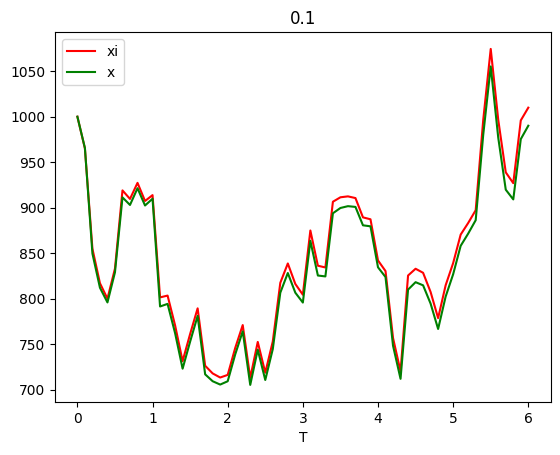

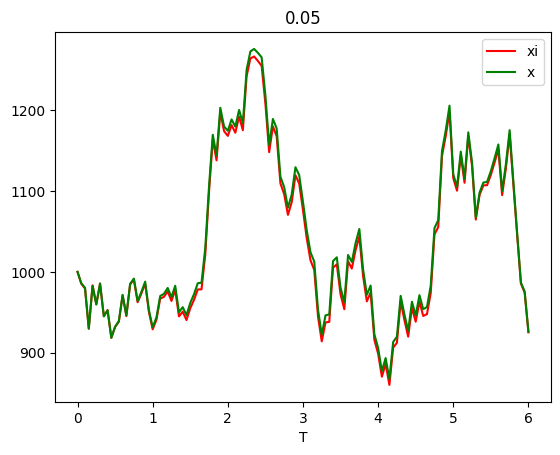

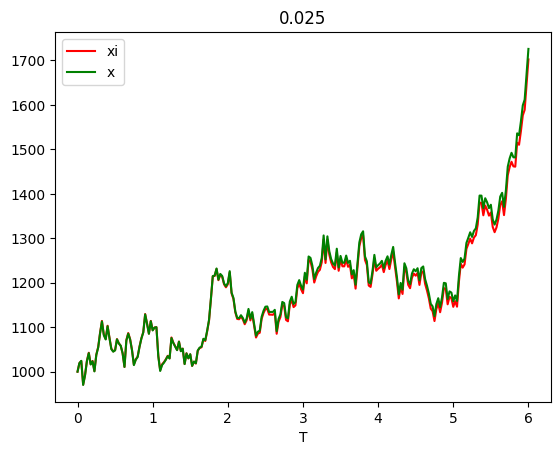

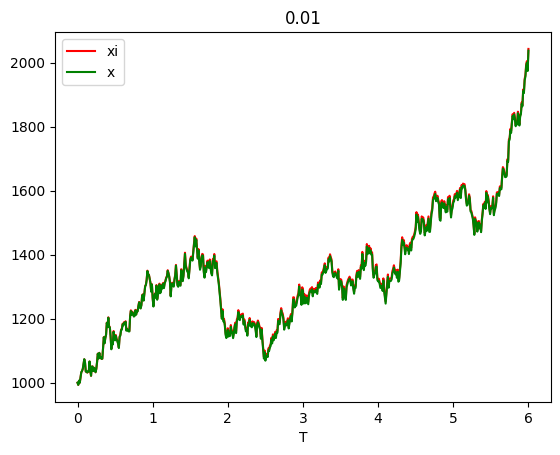

,0
0,38.766997
1,23.904722
2,10.608876
3,9.323072
4,7.181914
5,3.332911


In [ ]:
eps_arr = np.zeros(len(h))
eps_arr[0] = eps_b
for i in range(1,len(h)):
  w = W(T, h[i], n)
  xi = Xi(T, h[i], xi_0, a, b[0], w, n)
  x = X(T, h[i], xi_0, a, b[0], w, n)
  eps_arr[i] = eps_val (x,xi,n,T,h[i])

  N=int(T/h[i])+1
  s=np.linspace(0,T,N)
  plt.plot(s, xi[i], color='red',label='xi')
  plt.plot(s, x[i], color='green',label='x')
  plt.title(h[i])
  plt.xlabel("T")
  plt.legend()
  plt.show()

df = pd.DataFrame(eps_arr)
df


In [ ]:
F = np.ones((len(h), 2))
F[:, 1] = np.log(np.array(h))
df = pd.DataFrame(F)
df

,0,1
0,1.0,-0.693147
1,1.0,-1.386294
2,1.0,-2.302585
3,1.0,-2.995732
4,1.0,-3.688879
5,1.0,-4.605170


In [ ]:
beta=np.linalg.inv(F.T.dot(F)).dot(F.T).dot(np.log(eps_arr))
print('β =',beta)


β = [3.98191411 0.59279975]


In [ ]:
x_arr = np.zeros(len(h))
y_arr = np.zeros(len(eps_arr))
for i in range(len(h)):
  x_arr[i]=np.log(h[i])
  y_arr[i]=np.log(eps_arr[i])



In [ ]:
df = pd.DataFrame(x_arr)
df

,0
0,-0.693147
1,-1.386294
2,-2.302585
3,-2.995732
4,-3.688879
5,-4.605170


In [ ]:
df = pd.DataFrame(y_arr)
df

,0
0,3.657569
1,3.174076
2,2.361691
3,2.232492
4,1.971566
5,1.203846


In [ ]:
x = F.T[1]
y=[]
y.append(x*beta[1]+beta[0])
y

[array([3.57101663, 3.16011915, 2.61694223, 2.20604476, 1.79514728,
        1.25197036])]

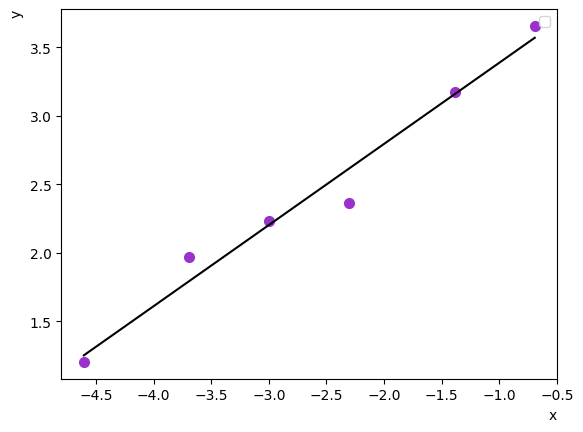

In [ ]:
plt.plot( x_arr, y_arr, 'o', markersize = 7, color='darkorchid')
plt.plot(x, y[0], color='black')
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top')
plt.legend()
plt.show()
